# **PROJECT**

I have successfuly modelled the Stock Market using the Ising Model in physics and Pavel Dvorak distribution equation and then used concepts such as Volatility Clustering, Fat-Tail Curve, Minor Game, Herding and Autocorrelation of Returns to compare my model's graphs with real world data of "S&P 500" stock data to check the credibility of my model.


## **APPLICATION OF ISING MODEL TO FINANCIAL MARKETS**

By simplifying a market into a similar two-state model, I can treat each market agent or stockholder as a spin in the lattice. Each agent is able to buy (+1) or sell (-1). The agents will be infuenced by their nearest neighbors as well as an overall magnetization of the market.



1. Ising model = market
2. Two-state spins = agents 
3. Spin value +/- = buy/sell
4. Magnetisation = current value (or sentiment) of the market

### **CALCULATING RETURNS** 
$$r(t)=v(t)-v(t-1)$$



## **BEHAVIORAL INFLUENCES ON FINANCIAL MARKETS**


### (a) **HERDING BEHAVIOR TERM** $$ \sum_{j=1}^{k}J_{ij}s_i(t) $$
The herding behavior is taken into account with the basic Ising Model calculations shown in the above equation. Going through and looking at the spins, or actions, of each agents nearest neighbors and then making a decision to flip or not flip based on that data is essentially what agents do in real life.

### (b) **MINORITY GAME** $$ \alpha |M(t)| $$ 
In order to account for the minority game behavior, we have to add in another term. This term will obviously oppose the herding behavior. In order to capture this behavior, we will add up all the values of the entire lattice and take the average. If the average is closer to sell (-1) or buy (+1) this term will entice the agent to do the opposite. This is similar to adding in a magnetization term into a ferromagnetic Ising Model calculation.

### **FLIPPING ENERGY FOR MARKETS** $$ h_i (t) = \sum_{j=1}^{k}J_{ij}s_i(t)-\alpha |M(t)| $$

### **PROBABILITY DISTRIBUTION** (PAVEL DVORAK)

$$ p= \frac{1}{1+exp(-\beta h_i(t))}$$



## ISING MODEL 

In [1]:
import numpy as np
from pylab import *
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import pcolormesh , show
from tqdm import tqdm

# Defining Constants #
k = 70
iterations = 12000
J = 1
alpha = 3
beta = 1
dt = 100 
parallel = 0

# Defining Arrays #
spinArray = np.matrix(np.zeros((k, k), dtype = float))
h = np.matrix(np.zeros((k, k), dtype = float))
stock = np.ones(iterations) 
mag = prob = np.zeros(iterations) 
prob = np.zeros(iterations) 
r = np.zeros(iterations) 
returns = np.zeros(iterations) 

# Defining Colors of my colorbar #
colors  =   [(41/255,34/255,177/255),   #Persian Blue
             (255/255,255/255,0/255)]   #Yellow

colormap = LinearSegmentedColormap.from_list('my_colormap', colors)

for i in range(k):
    for j in range(k):
        spinArray[i,j] = round(np.random.random())*2-1 

for t in tqdm(range(iterations)):
    for l in range(k):
        for p in range(k):
            mag[t] += (1/k**2)*spinArray[l,p]
    for n in range(k):
        for m in range(k):
            if parallel == 0:
                n = round(np.random.random()*(k-1))
                m = round(np.random.random()*(k-1))
            center = spinArray[n,m]
            if n == 0:
                top = spinArray[k-1,m]
            else:
                top = spinArray[n-1,m]
            if n == k-1:
                bottom = spinArray[0,m]
            else:
                bottom = spinArray[n+1,m]
            if m == k-1:
                right = spinArray[n,0]
            else:
                right = spinArray[n,m+1]
            if m == 0:
                left = spinArray[n,k-1]
            else:
                left = spinArray[n,m-1]
            
        h[n,m] = (top+bottom+left+right)*center - alpha*abs(mag[t])
        prob[t] = 1/(1+np.exp(-1*beta*h[n,m]))
        if h[n,m] <= 0:
            spinArray[n,m] = -1*spinArray[n,m]
        else:
            r[t] = np.random.random()
            if r[t] >= prob[t]:
                spinArray[n,m] = -1*spinArray[n,m]
                
    if t>0:
        returns[t] = mag[t] - mag[t-1]
        stock[t] = stock[t-1] + returns[t]
               


# Exporting our arrays into Excel files #
returns = pd.DataFrame(returns)
stock = pd.DataFrame(stock)
returns.to_excel('returns.xlsx')
stock.to_excel('stock.xlsx')

100%|██████████| 12000/12000 [24:25<00:00,  8.19it/s]


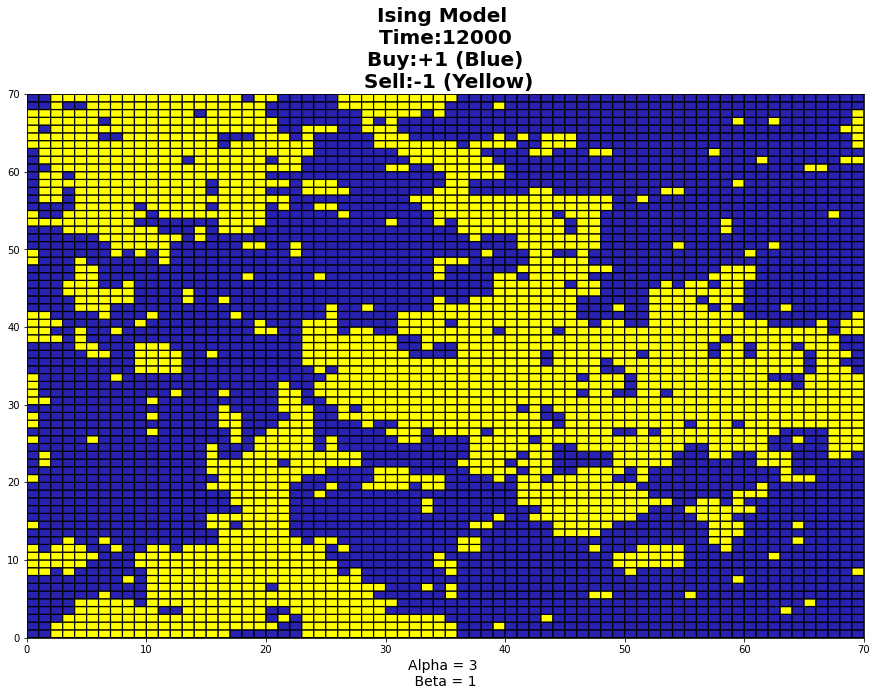

In [2]:
fig, axs = plt.subplots(figsize=(15,10))
axs.set_title(f"Ising Model \n Time:{t+1} \n Buy:+1 (Blue) \n Sell:-1 (Yellow)",fontsize=20,fontweight='bold')
axs.set_xlabel(f"Alpha = {alpha} \n Beta = 1 ",fontsize=14)
y = spinArray.tolist()
axs.pcolor(y,cmap = colormap, edgecolors='k', linewidths=1.2)
#savefig(f"{t}.png")
show()   

## **DOWNLOADING DATA FROM YAHOO FINANCE**

In [3]:
import pandas as pd
import yfinance as yf

stock_data = yf.download(["^GSPC"], start="1981-01-02", end="2015-10-20")  ##### ^GSPC is represents S&P 500 Stock #####
stock_data.to_excel('SP Data.xlsx')

[*********************100%***********************]  1 of 1 completed


## **IMPORTING DATA INTO PYTHON AND DEFINING FUNCTIONS**

In [4]:
from pylab import *
from numpy import *
from pandas import *
from math import *
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

###### random data ###########
mag_random=[np.random.uniform(-0.5,0.5)]
stocks_random=[1]
returns_random=[0]
for i in range(1,iterations):
    m=np.random.uniform(-0.5,0.5)
    mag_random.append(m)
    returns_random.append(mag_random[i]-mag_random[i-1])
    stocks_random.append(stocks_random[i-1]+mag_random[i])

def Gauss1(x,A):
    mean=np.mean(A)
    std=0.67*np.std(A)
    G=(1/(2*np.pi*std*std))**0.5*np.exp((-0.5*(x-mean)**2)/(std*std))
    return(G)

def Gauss2(x,A):
    mean=np.mean(A)
    std=0.92*np.std(A)
    G=(1/(2*np.pi*std*std))**0.5*np.exp((-0.5*(x-mean)**2)/(std*std))
    return(G)

def Gauss3(x,A):
    mean=np.mean(A)
    std=np.std(A)
    G=(1/(2*np.pi*std*std))**0.5*np.exp((-0.5*(x-mean)**2)/(std*std))
    return(G)


def counter(IsingModel):
    ##### TOGGLE b/w "STOCK MARKET" DATA and "ISING MODEL" DATA #####
    data1 = read_excel("Data/S&P 500/returns.xlsx")
    if IsingModel == 0:    
        data = read_excel("Data/S&P 500/SP Data.xlsx") ##### Replace 'S&P 500' with 'NIFTY 50' to TOGGLE ######
        dailyValue = transpose(data.Close)                                       
        returns = transpose(data.Simple_Returns) 
    else:
        data = read_excel("Data/S&P 500/stock.xlsx")    
        dailyValue = transpose(data.Stock_Prices)       ##### THIS WILL REMAIN THE SAME FOR BOTH CASES #####
        returns = transpose(data1.Returns) 
    
    
    dataSize = size(dailyValue)
    startDate = date.toordinal(date(year=1981, month=1, day=2))  ##### SETTING X-AXIS AS THE DAYS ##### 
    endDate = date.toordinal(date(year=2015, month=10, day=20))
    xData = linspace(startDate,endDate,dataSize)
    
    return [data,dailyValue,returns,data1,dataSize,startDate,endDate,xData]


## **PLOTTING STOCKS**

Text(0, 0.5, 'Stock Prices (USD)')

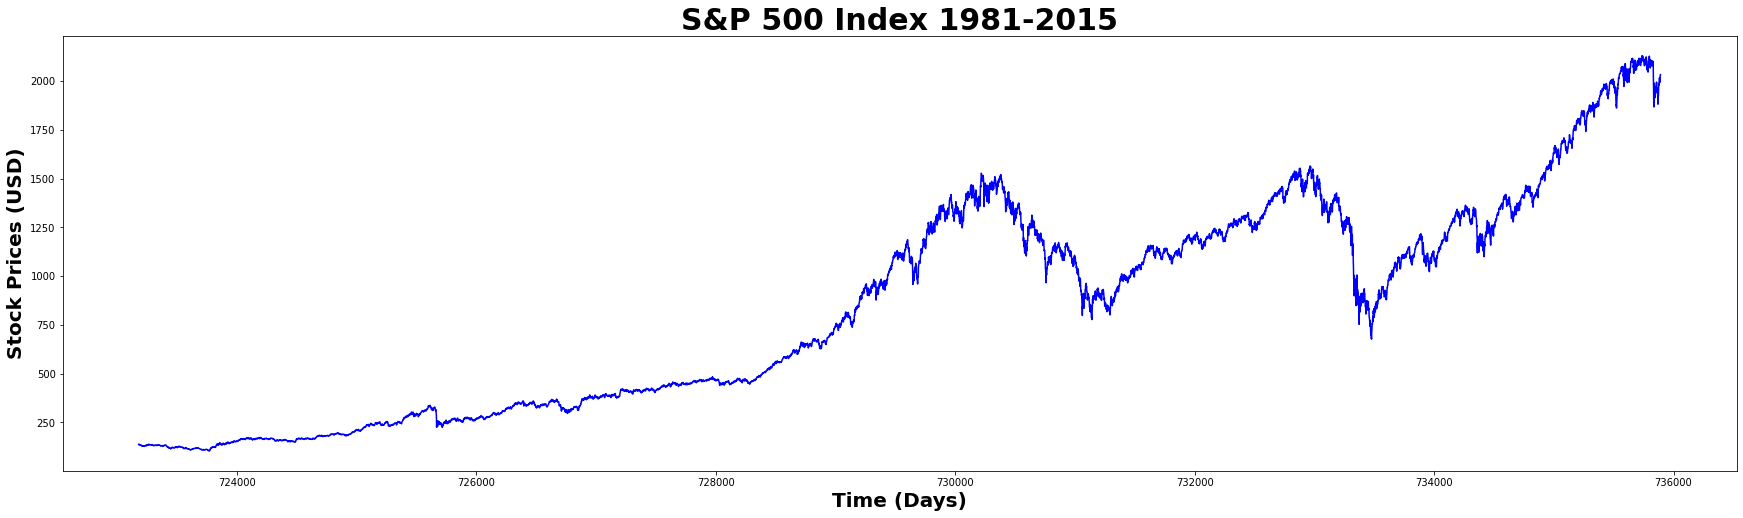

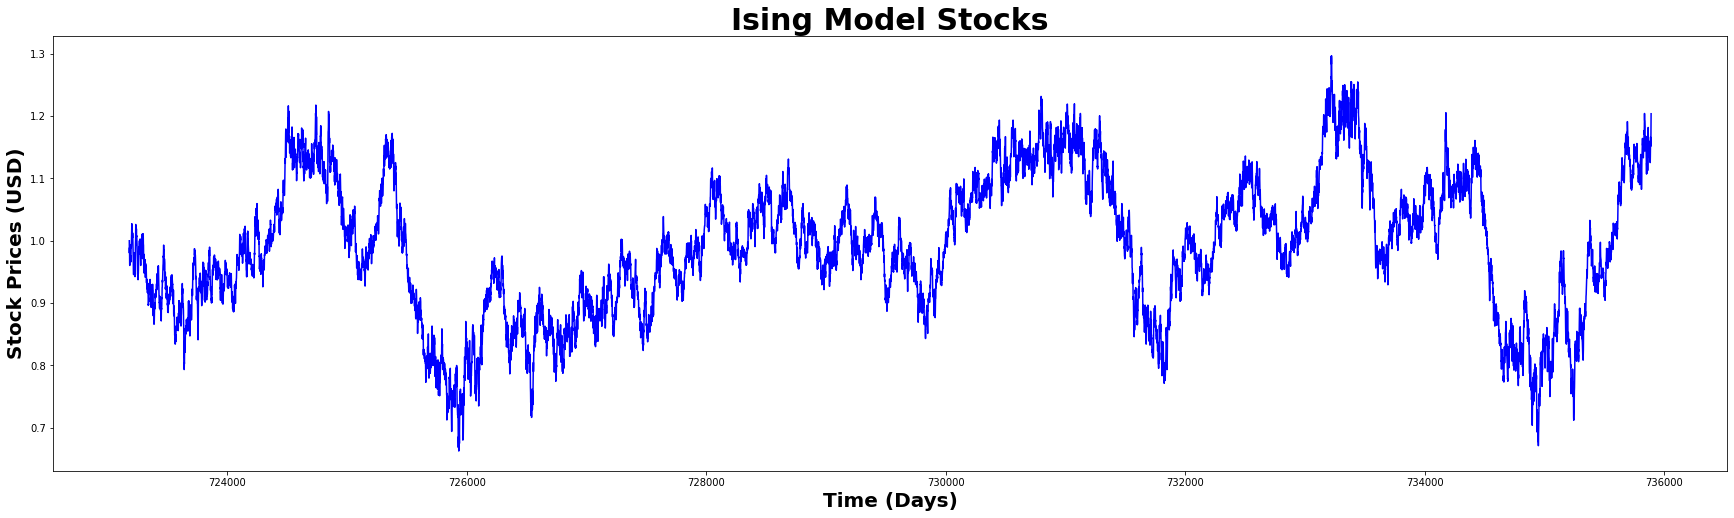

In [5]:
data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(0)[0],counter(0)[1],counter(0)[2],counter(0)[3],counter(0)[4],counter(0)[5],counter(0)[6],counter(0)[7]
fig, axs = plt.subplots(figsize=(30,8))
axs.plot(xData,dailyValue,'blue')
axs.set_title('S&P 500 Index 1981-2015',fontsize=30,fontweight='bold')
#axs.set_title('NIFTY 50 Index 2007-2021',fontsize=30,fontweight='bold')
axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
axs.set_ylabel('Stock Prices (USD)',fontsize=20,fontweight='bold')

data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(1)[0],counter(1)[1],counter(1)[2],counter(1)[3],counter(1)[4],counter(1)[5],counter(1)[6],counter(1)[7]
fig, axs = plt.subplots(figsize=(30,8))
axs.plot(xData,dailyValue,'blue')
axs.set_title('Ising Model Stocks',fontsize=30,fontweight='bold')
axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
axs.set_ylabel('Stock Prices (USD)',fontsize=20,fontweight='bold')


## **VOLATILITY CLUSTERING**

Financial markets demonstrate volatility clustering as one of their most visible attributes. Volatility clustering is how a 
fluctuation in the market is most likely followed by another fluctuation of the same kind. In other words, it is the pattern of large fluctuations followed by large fluctuations, and small fluctuations followed by small fluctuations.

## **PLOTTING DAILY RETURNS (VOLATILITY CLUSTERING)**

(-1.75, 1.75)

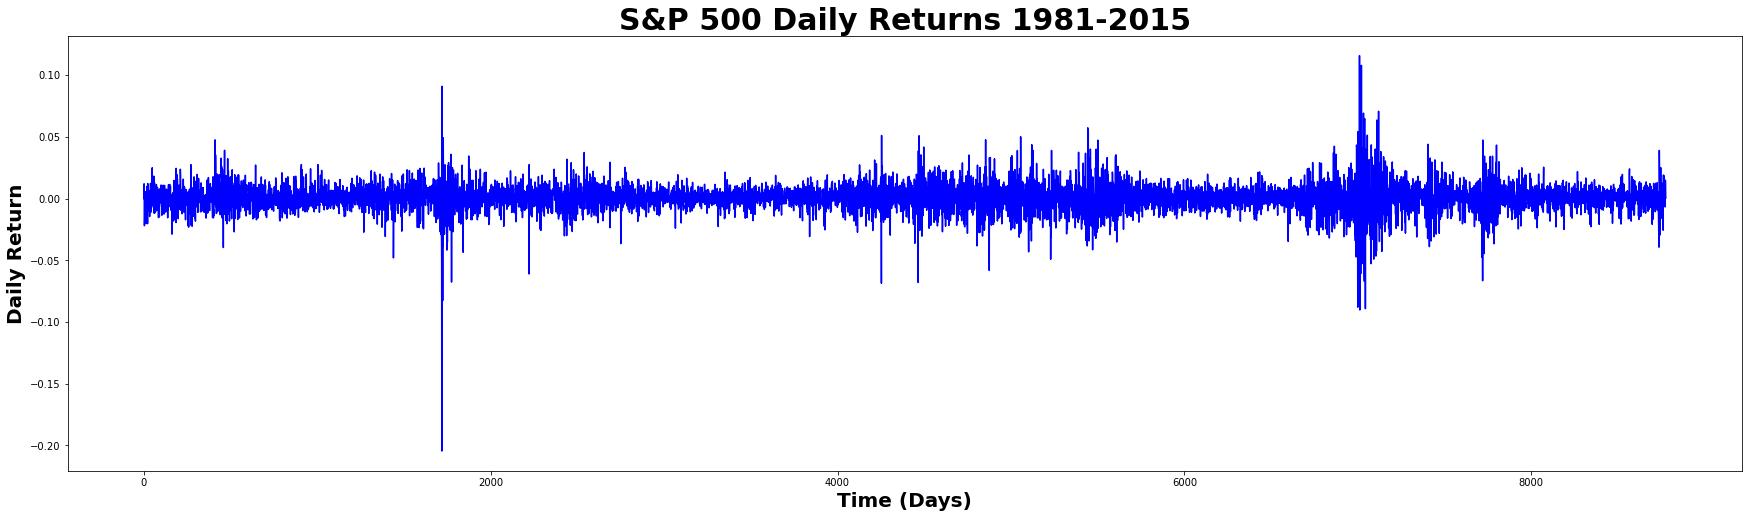

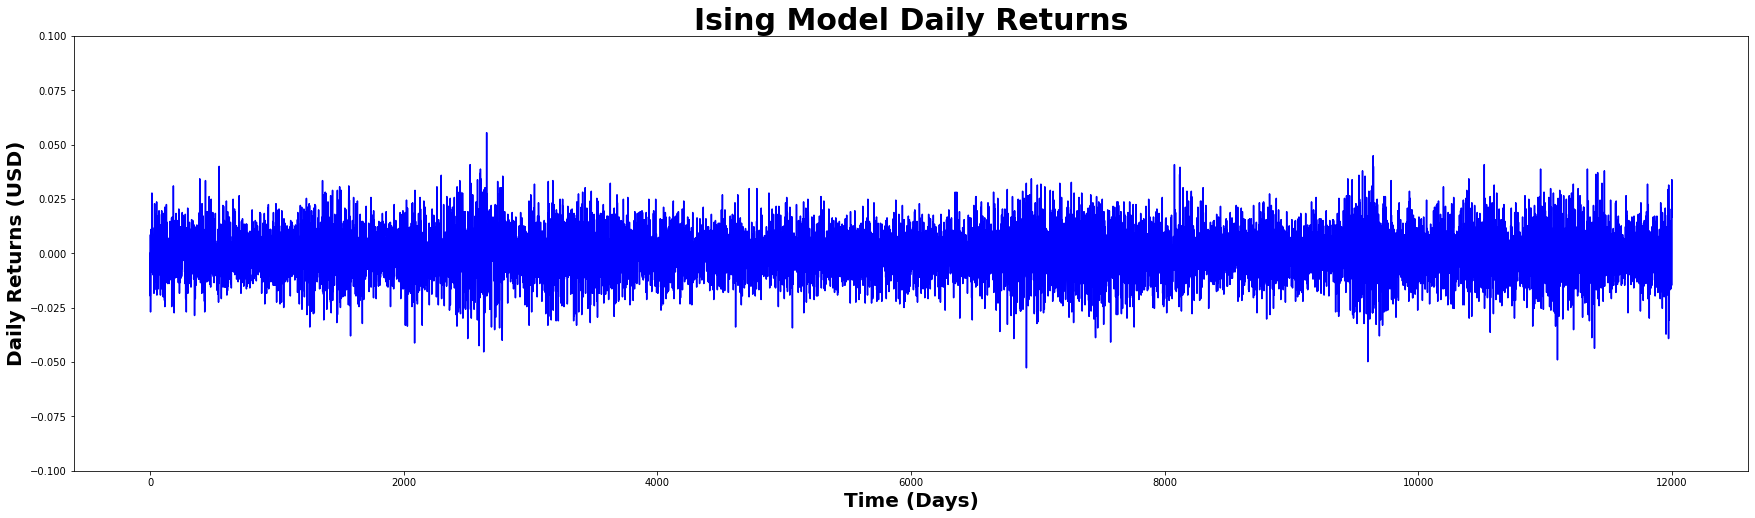

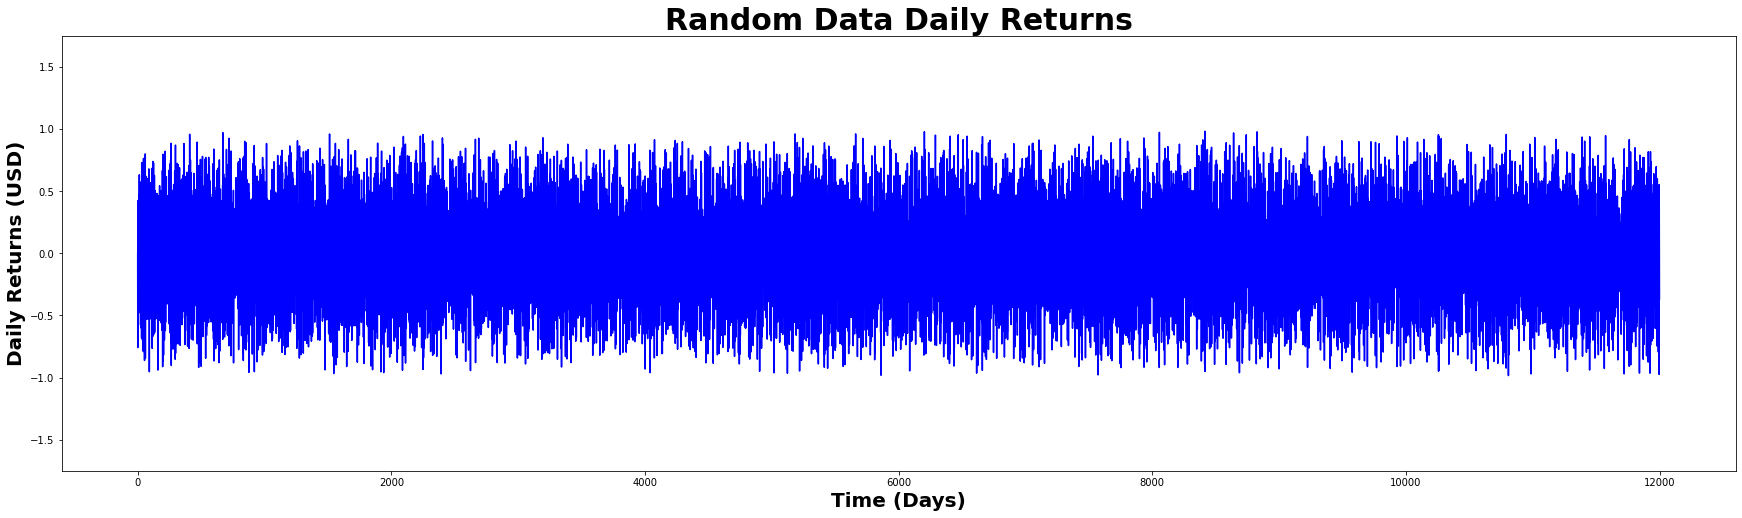

In [6]:
data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(0)[0],counter(0)[1],counter(0)[2],counter(0)[3],counter(0)[4],counter(0)[5],counter(0)[6],counter(0)[7]
fig, axs = plt.subplots(figsize=(30,8))
axs.plot(returns,'blue')
axs.set_title('S&P 500 Daily Returns 1981-2015',fontsize=30,fontweight='bold')
#axs.set_title('NIFTY 50 Daily Returns 2007-2021',fontsize=30,fontweight='bold')
axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
axs.set_ylabel('Daily Return',fontsize=20,fontweight='bold')

data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(1)[0],counter(1)[1],counter(1)[2],counter(1)[3],counter(1)[4],counter(1)[5],counter(1)[6],counter(1)[7]
fig, axs = plt.subplots(figsize=(30,8))
axs.plot(returns,'blue')
axs.set_title('Ising Model Daily Returns',fontsize=30,fontweight='bold')
axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
axs.set_ylabel('Daily Returns (USD)',fontsize=20,fontweight='bold')
axs.set_ylim(-0.1,0.1)
    

fig, axs = plt.subplots(figsize=(30,8))
axs.plot([i for i in range(iterations)],returns_random,'blue')
axs.set_title('Random Data Daily Returns',fontsize=30,fontweight='bold')
axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
axs.set_ylabel('Daily Returns (USD)',fontsize=20,fontweight='bold')
axs.set_ylim(-1.75,1.75)

## **AUTOCORRELATION OF RETURNS**
$$ \rho_A(\tau)=\frac{\sum_{t=r+1}^{T}(|r_t|-|\bar{r}|)(|r_{t-r}|-|\bar{r}|)}{\sum_{t=1}^{T}(|r_t|-|\bar{r}|)^2}$$

Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. The analysis of autocorrelation is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal.

100%|██████████| 180/180 [00:08<00:00, 20.98it/s]


(0.65, 0.7)

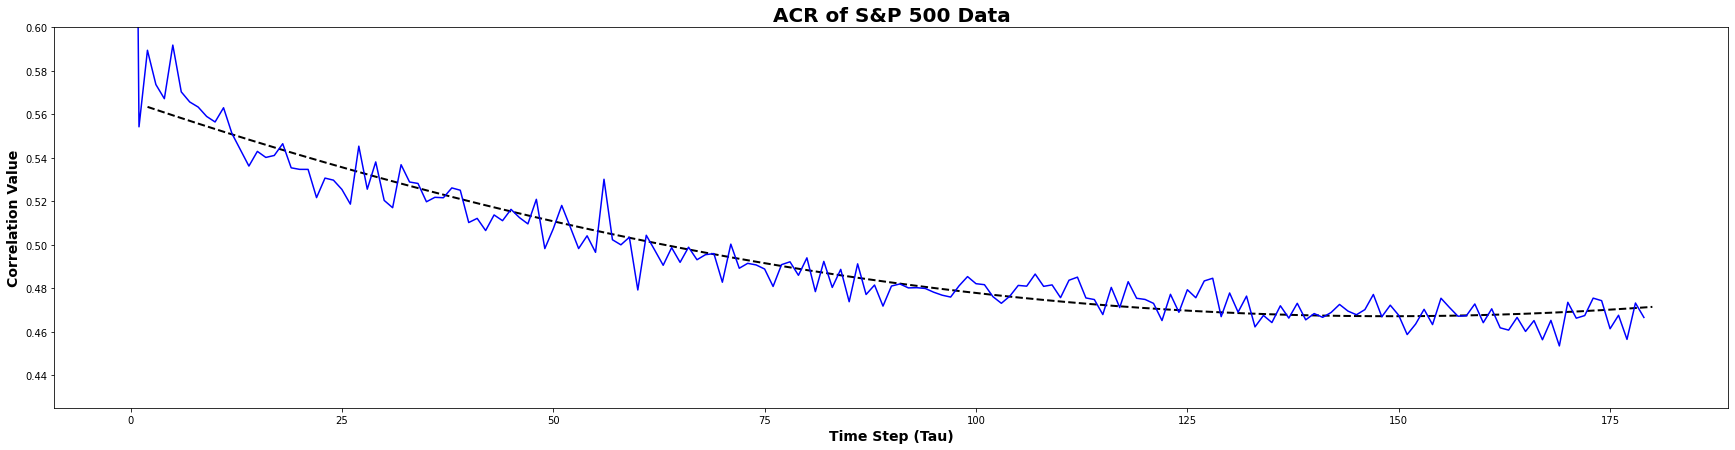

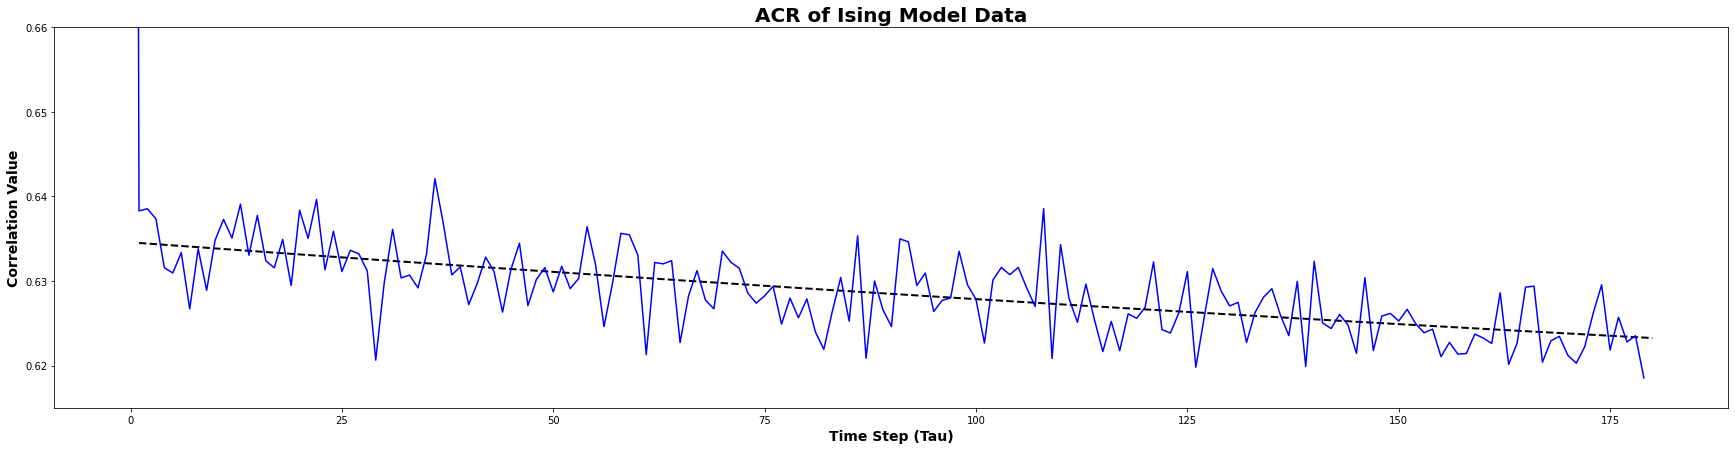

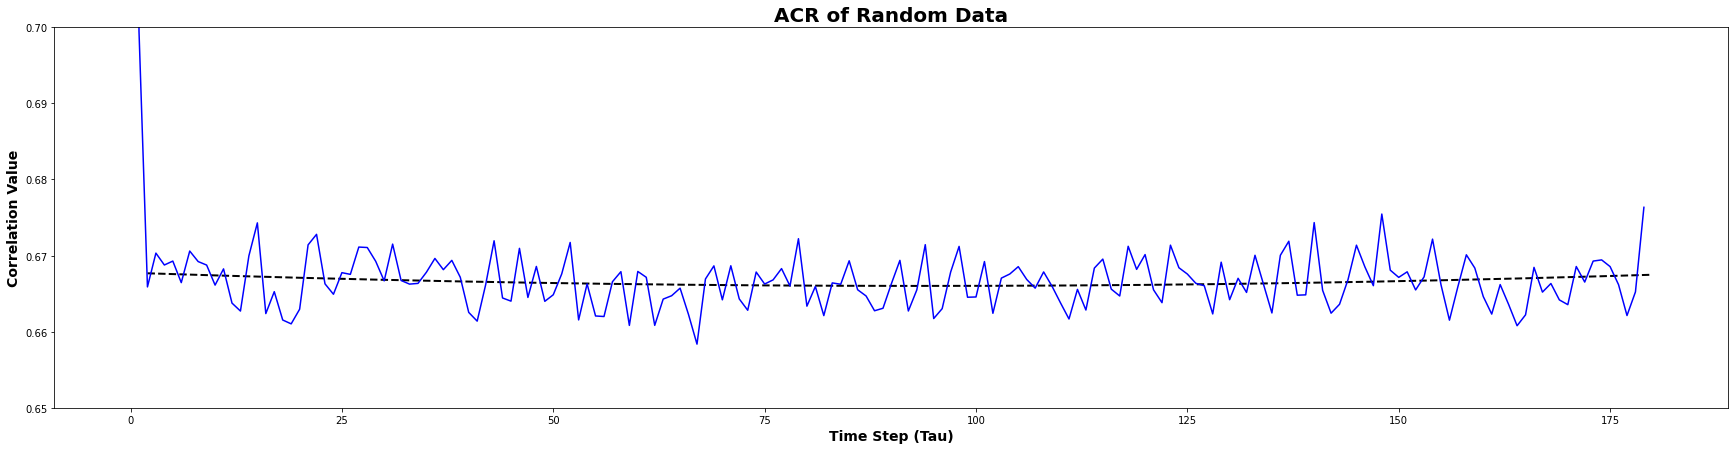

In [7]:
from tqdm import tqdm
nmax , C , sigma , mu , n , dn , average , tauMax  = size(returns) , 0 , 0.2 , 0 , 0 , 1 , 0 , 180 
data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(0)[0],counter(0)[1],counter(0)[2],counter(0)[3],counter(0)[4],counter(0)[5],counter(0)[6],counter(0)[7]
for i in range(dataSize-1):
    average += returns[i]
average = average/dataSize
ACReturns = zeros(tauMax)
n = 0
X = linspace(0,tauMax,180)

for tau in tqdm(range(tauMax)):
    numerator = 0
    denominator = 0
    for m in range(tau,dataSize-1):
        numerator += ((abs(returns[m])-abs(average))*(abs(returns[m-tau])-abs(average)))
        denominator += ((abs(returns[m-tau])-abs(average))**2)
    ACReturns[n] = numerator/denominator
    n += 1

fig, axs = plt.subplots(figsize=(30,7))
z = np.polyfit(X[2:], ACReturns[2:], 2)
p = np.poly1d(z)
axs.plot(X[2:],p(X[2:]),"k--",linewidth=2.0)
axs.plot(ACReturns,'blue')
axs.set_title('ACR of S&P 500 Data',fontsize=20,fontweight='bold')
#axs.set_title('ACR of NIFTY 50 Data',fontsize=20,fontweight='bold')
axs.set_xlabel('Time Step (Tau)',fontsize=14,fontweight='bold')
axs.set_ylabel('Correlation Value',fontsize=14,fontweight='bold')
axs.set_ylim(0.425,0.60)



data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(1)[0],counter(1)[1],counter(1)[2],counter(1)[3],counter(1)[4],counter(1)[5],counter(1)[6],counter(1)[7]
for i in range(dataSize-1):
    average += returns[i]
average = average/dataSize
ACReturns = zeros(tauMax)
n = 0
X = linspace(0,tauMax,180)

for tau in tqdm(range(tauMax)):
    numerator = 0
    denominator = 0
    for m in range(tau,dataSize-1):
        numerator += ((abs(returns[m])-abs(average))*(abs(returns[m-tau])-abs(average)))
        denominator += ((abs(returns[m-tau])-abs(average))**2)
    ACReturns[n] = numerator/denominator
    n += 1

fig, axs = plt.subplots(figsize=(30,7))
z = np.polyfit(X[1:], ACReturns[1:], 2)
p = np.poly1d(z)
axs.plot(X[1:],p(X[1:]),"k--",linewidth=2.0)
axs.plot(ACReturns,'blue')
axs.set_title('ACR of Ising Model Data',fontsize=20,fontweight='bold')
axs.set_xlabel('Time Step (Tau)',fontsize=14,fontweight='bold')
axs.set_ylabel('Correlation Value',fontsize=14,fontweight='bold')
axs.set_ylim(0.615,0.66)


########## Random data
average_random=0
for i in range(iterations-1):
    average_random += returns_random[i]
average_random = average_random/iterations
ACReturns_random = zeros(tauMax)
n = 0
X = linspace(0,tauMax,180)

for tau in tqdm(range(tauMax)):
    numerator_random = 0
    denominator_random = 0
    for m in range(tau,iterations-1):
        numerator_random += ((abs(returns_random[m])-abs(average_random))*(abs(returns_random[m-tau])-abs(average_random)))
        denominator_random += ((abs(returns_random[m-tau])-abs(average_random))**2)
    ACReturns_random[n] = numerator_random/denominator_random
    n += 1

fig, axs = plt.subplots(figsize=(30,7))
z = np.polyfit(X[2:], ACReturns_random[2:], 2)
p = np.poly1d(z)
axs.plot(X[2:],p(X[2:]),"k--",linewidth=2.0)
axs.plot(ACReturns_random,'blue')
axs.set_title('ACR of Random Data',fontsize=20,fontweight='bold')
axs.set_xlabel('Time Step (Tau)',fontsize=14,fontweight='bold')
axs.set_ylabel('Correlation Value',fontsize=14,fontweight='bold')
axs.set_ylim(0.65,0.70)

## **FAT-TAIL DISTRIBUTION (PLOTTING HISTOGRAM OF DAILY RETURNS)**

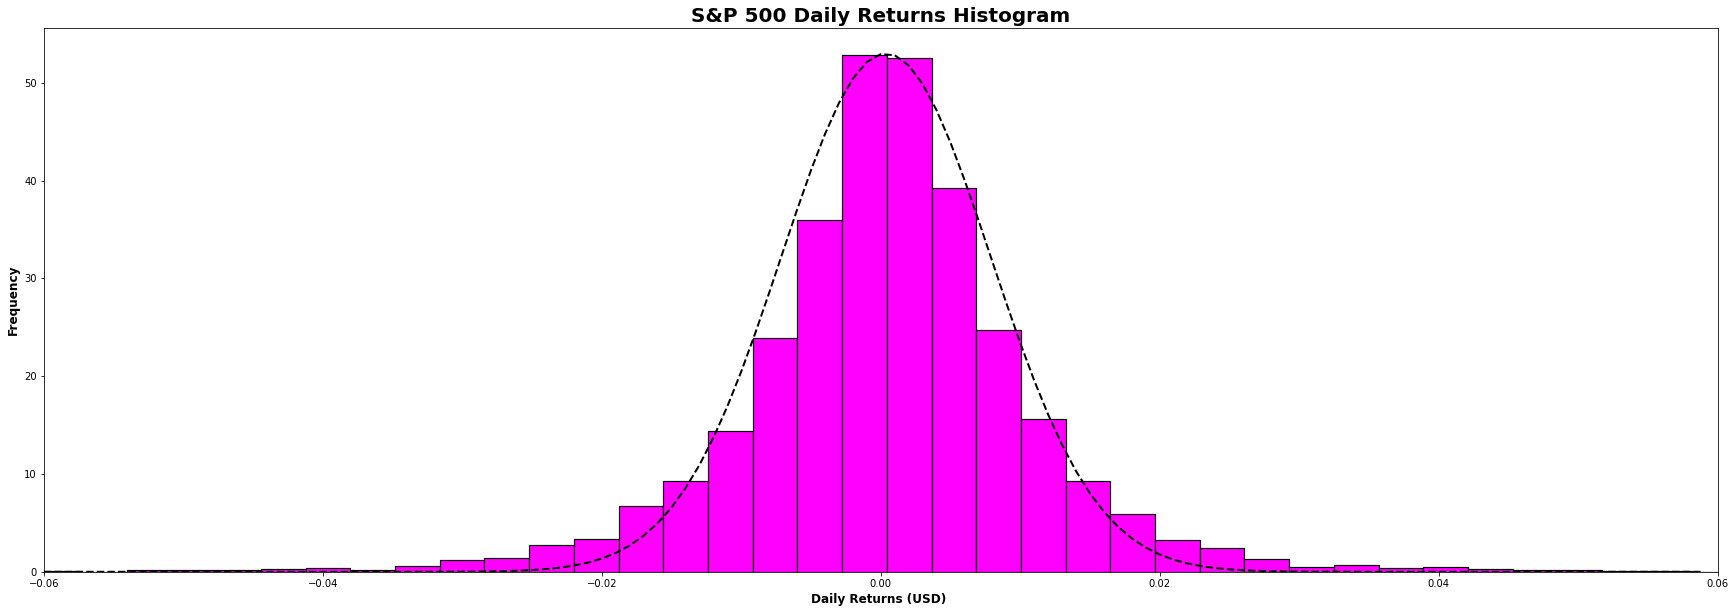

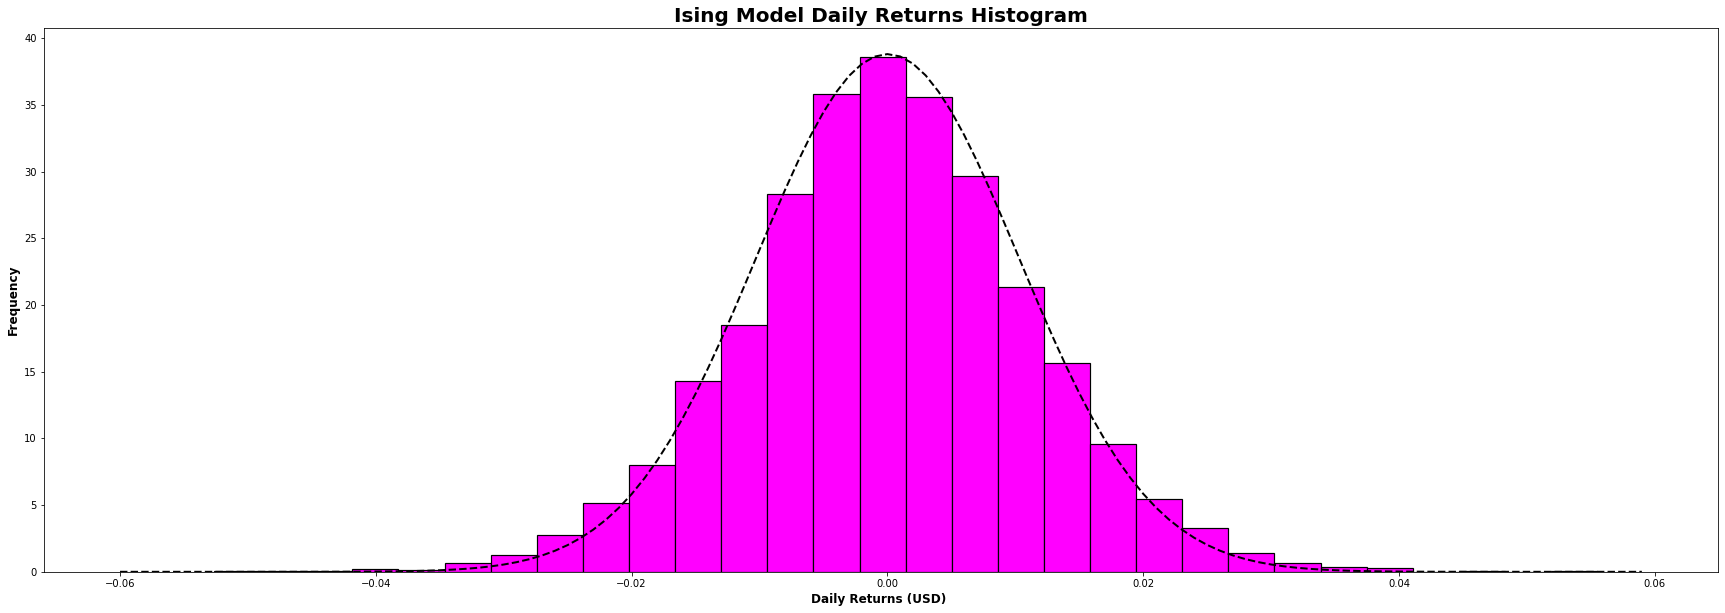

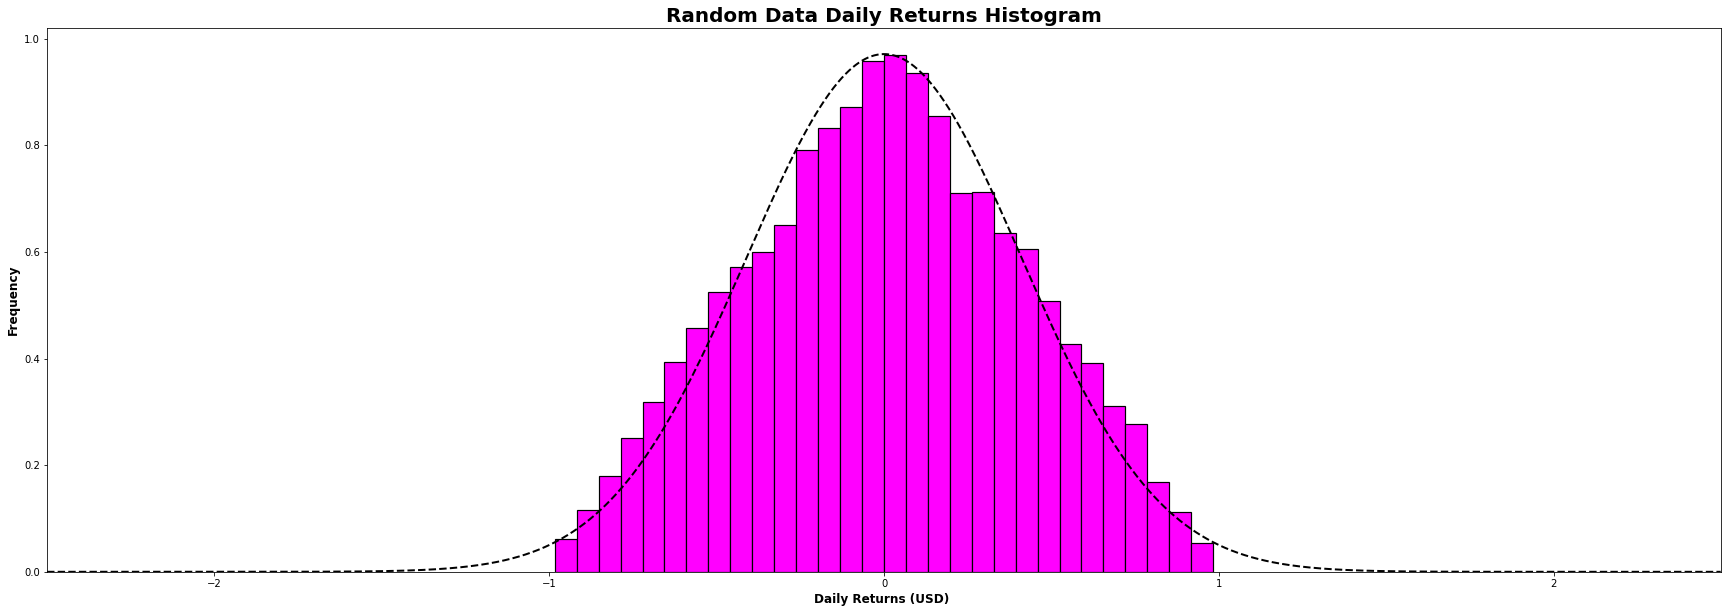

In [8]:
data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(0)[0],counter(0)[1],counter(0)[2],counter(0)[3],counter(0)[4],counter(0)[5],counter(0)[6],counter(0)[7]
fig, axs = plt.subplots(figsize=(30,10))
axs.hist(returns,100,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
axs.set_title('S&P 500 Daily Returns Histogram',fontsize=20,fontweight='bold')
#axs.set_title('NIFTY 50 Daily Returns Histogram',fontsize=20,fontweight='bold')
axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')
axs.set_xlim(-0.06,0.06)
x=np.arange(-0.06,0.06,0.001)
axs.plot(x,Gauss1(x,returns),"k--",linewidth=2.0)
         
data,dailyValue,returns,data1,dataSize,startDate,endDate,xData=counter(1)[0],counter(1)[1],counter(1)[2],counter(1)[3],counter(1)[4],counter(1)[5],counter(1)[6],counter(1)[7]
fig, axs = plt.subplots(figsize=(30,10))
axs.hist(returns,30,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
axs.set_title('Ising Model Daily Returns Histogram',fontsize=20,fontweight='bold')
axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')
x=np.arange(-0.06,0.06,0.001)
axs.plot(x,Gauss2(x,returns),"k--",linewidth=2.0)
         
fig, axs = plt.subplots(figsize=(30,10))
axs.hist(returns_random,30,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
axs.set_title('Random Data Daily Returns Histogram',fontsize=20,fontweight='bold')
axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')
axs.set_xlim(-2.5,2.5)
x=np.arange(-2.5,2.5,0.001)
axs.plot(x,Gauss3(x,returns_random),"k--",linewidth=2.0)